<a href="https://colab.research.google.com/github/saikola2004/fmml_22B214551/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/validation.csv')

In [ ]:
df.head()

,id,title,context,question,answers
0,621723207492,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,من هو حمزة بن عبد المطلب؟,{'text': array(['صحابي من صحابة رسول الإسلام م...
1,189105393656,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,بما وصفه رسول الله؟,"{'text': array(['وَخَيْرُ أَعْمَامِي'], dtype=..."
2,662616978980,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,بما وصف رسول الله على ؟,"{'text': array(['«خَيْرُ إِخْوَتِي عَلِيٌّ،'],..."
3,50146585922,حمزة بن عبد المطلب,أسلم حمزة في السنة الثانية من بعثة النبي محمد،...,متى اسلم حمزة؟,{'text': array(['في السنة الثانية من بعثة النب...
4,259563807541,حمزة بن عبد المطلب,أسلم حمزة في السنة الثانية من بعثة النبي محمد،...,و ماذا فعل فى غزوة بدر؟,{'text': array(['وقَتَلَ فيها شيبة بن ربيعة مب...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        702 non-null    int64 
 1   title     702 non-null    object
 2   context   702 non-null    object
 3   question  702 non-null    object
 4   answers   702 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
df.dropna()

,id,title,context,question,answers
0,621723207492,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,من هو حمزة بن عبد المطلب؟,{'text': array(['صحابي من صحابة رسول الإسلام م...
1,189105393656,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,بما وصفه رسول الله؟,"{'text': array(['وَخَيْرُ أَعْمَامِي'], dtype=..."
2,662616978980,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,بما وصف رسول الله على ؟,"{'text': array(['«خَيْرُ إِخْوَتِي عَلِيٌّ،'],..."
3,50146585922,حمزة بن عبد المطلب,أسلم حمزة في السنة الثانية من بعثة النبي محمد،...,متى اسلم حمزة؟,{'text': array(['في السنة الثانية من بعثة النب...
4,259563807541,حمزة بن عبد المطلب,أسلم حمزة في السنة الثانية من بعثة النبي محمد،...,و ماذا فعل فى غزوة بدر؟,{'text': array(['وقَتَلَ فيها شيبة بن ربيعة مب...
...,...,...,...,...,...
697,470812622665,السودان,استقل السودان عن بريطانيا و مصر في الأول من ين...,متى استعلت الحرب الأهلية في السودان؟,"{'text': array(['منذ قبيل إعلان الاستقلال'], d..."
698,950438628756,السودان,استقل السودان عن بريطانيا و مصر في الأول من ين...,متى توقفت الحرب الأهلية في السودان؟,"{'text': array(['2005'], dtype=object), 'answe..."
699,296368076837,السودان,تكررت الإنقلابات العسكرية في تاريخ السودان الح...,في أي سنة وقع آخر انقلاب عسكري في السودان؟,"{'text': array(['عام 1989'], dtype=object), 'a..."
700,349611596646,السودان,تكررت الإنقلابات العسكرية في تاريخ السودان الح...,من قاد الانقلاب العسكري؟,"{'text': array(['العميد عمر البشير'], dtype=ob..."


In [ ]:
print(df.shape)

(702, 5)


In [ ]:
df.columns

Index(['id', 'title', 'context', 'question', 'answers'], dtype='object')

In [ ]:
df.describe()

,id
count,7.020000e+02
mean,5.205604e+11
std,2.899937e+11
min,4.664484e+09
25%,2.692352e+11
50%,5.233916e+11
75%,7.765412e+11
max,9.993583e+11


In [ ]:
df.describe(include='all')

,id,title,context,question,answers
count,7.020000e+02,702,702,702,702
unique,NaN,78,234,699,695
top,NaN,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,متى توفى؟,{'text': array(['القرآني أخبر بحقائق كونية لم ...
freq,NaN,9,3,2,3
mean,5.205604e+11,NaN,NaN,NaN,NaN
std,2.899937e+11,NaN,NaN,NaN,NaN
min,4.664484e+09,NaN,NaN,NaN,NaN
25%,2.692352e+11,NaN,NaN,NaN,NaN
50%,5.233916e+11,NaN,NaN,NaN,NaN
75%,7.765412e+11,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

id          0
title       0
context     0
question    0
answers     0
dtype: int64

In [ ]:
df.fillna(0)

,id,title,context,question,answers
0,621723207492,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,من هو حمزة بن عبد المطلب؟,{'text': array(['صحابي من صحابة رسول الإسلام م...
1,189105393656,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,بما وصفه رسول الله؟,"{'text': array(['وَخَيْرُ أَعْمَامِي'], dtype=..."
2,662616978980,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,بما وصف رسول الله على ؟,"{'text': array(['«خَيْرُ إِخْوَتِي عَلِيٌّ،'],..."
3,50146585922,حمزة بن عبد المطلب,أسلم حمزة في السنة الثانية من بعثة النبي محمد،...,متى اسلم حمزة؟,{'text': array(['في السنة الثانية من بعثة النب...
4,259563807541,حمزة بن عبد المطلب,أسلم حمزة في السنة الثانية من بعثة النبي محمد،...,و ماذا فعل فى غزوة بدر؟,{'text': array(['وقَتَلَ فيها شيبة بن ربيعة مب...
...,...,...,...,...,...
697,470812622665,السودان,استقل السودان عن بريطانيا و مصر في الأول من ين...,متى استعلت الحرب الأهلية في السودان؟,"{'text': array(['منذ قبيل إعلان الاستقلال'], d..."
698,950438628756,السودان,استقل السودان عن بريطانيا و مصر في الأول من ين...,متى توقفت الحرب الأهلية في السودان؟,"{'text': array(['2005'], dtype=object), 'answe..."
699,296368076837,السودان,تكررت الإنقلابات العسكرية في تاريخ السودان الح...,في أي سنة وقع آخر انقلاب عسكري في السودان؟,"{'text': array(['عام 1989'], dtype=object), 'a..."
700,349611596646,السودان,تكررت الإنقلابات العسكرية في تاريخ السودان الح...,من قاد الانقلاب العسكري؟,"{'text': array(['العميد عمر البشير'], dtype=ob..."


In [ ]:
a=df.drop(columns='id')

In [ ]:
a.head()

,title,context,question,answers
0,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,من هو حمزة بن عبد المطلب؟,{'text': array(['صحابي من صحابة رسول الإسلام م...
1,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,بما وصفه رسول الله؟,"{'text': array(['وَخَيْرُ أَعْمَامِي'], dtype=..."
2,حمزة بن عبد المطلب,حمزة بن عبد المطلب الهاشمي القرشي صحابي من صحا...,بما وصف رسول الله على ؟,"{'text': array(['«خَيْرُ إِخْوَتِي عَلِيٌّ،'],..."
3,حمزة بن عبد المطلب,أسلم حمزة في السنة الثانية من بعثة النبي محمد،...,متى اسلم حمزة؟,{'text': array(['في السنة الثانية من بعثة النب...
4,حمزة بن عبد المطلب,أسلم حمزة في السنة الثانية من بعثة النبي محمد،...,و ماذا فعل فى غزوة بدر؟,{'text': array(['وقَتَلَ فيها شيبة بن ربيعة مب...


In [ ]:
len(df)

702

In [ ]:
le=LabelEncoder()
df["answers"]=le.fit_transform(df["answers"])

In [ ]:
le=LabelEncoder()
df["question"]=le.fit_transform(df["question"])

In [ ]:
selected_feature=['question','answers']

In [ ]:
x=df['question']
y=df['answers']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x.values.reshape(-1,1),y,test_size=0.2,random_state=30)

In [ ]:
model=SVR()
model.fit(x_train, y_train)

SVR()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 37374.58876388637


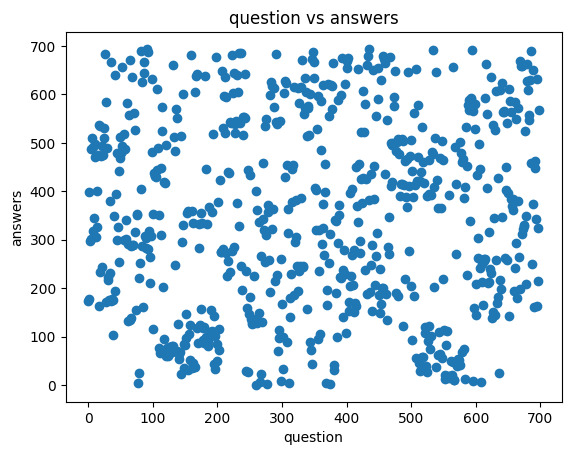

In [ ]:
plt.scatter(df['question'],df['answers'])
plt.xlabel("question")
plt.ylabel("answers")
plt.title('question vs answers')
plt.show()